In [ ]:
# Movie Correlation Project

In [ ]:
# Data source: https://www.kaggle.com/datasets/danielgrijalvas/movies/data 

# Content
# There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

# budget: the budget of a movie. Some movies don't have this, so it appears as 0

# company: the production company

# country: country of origin

# director: the director

# genre: main genre of the movie.

# gross: revenue of the movie

# name: name of the movie

# rating: rating of the movie (R, PG, etc.)

# released: release date (YYYY-MM-DD)

# runtime: duration of the movie

# score: IMDb user rating

# votes: number of user votes

# star: main actor/actress

# writer: writer of the movie

# year: year of release

In [9]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Reading in the data from the csv file

df = pd.read_csv(r"movies.csv")

In [22]:
# Looking at the data

df.head(25)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [10]:
# Checking for missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [16]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [30]:
# Checking data types for the columns

df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
Year Correct     object
dtype: object

In [17]:
# Changing data types of columns budget and gross

#df['budget'] = df['budget'].astype('int64')
#df['gross'] = df['gross'].astype('int64')

# Convert non-numeric values to NaNs
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

In [18]:
# Filling NaNs with a default value of zero (0)

df['budget'].fillna(0, inplace=True)
df['gross'].fillna(0, inplace=True)

In [19]:
# Converting the columns to int64

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [23]:
df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [26]:
# Creating a correct Year Column

df['Year Correct'] = df['released'].str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [27]:
df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [29]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'Year Correct'],
      dtype='object')

In [46]:
# order by the gross revenue

df = df.sort_values(by='gross', ascending=False)

In [45]:
# pd.set_option('display.max_rows', None)
# Had to revert the above setting so that pandas does not display all rows of the DataFrame, was taking too long to load
pd.reset_option('display.max_rows')

In [38]:
# Dropping any Duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [41]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


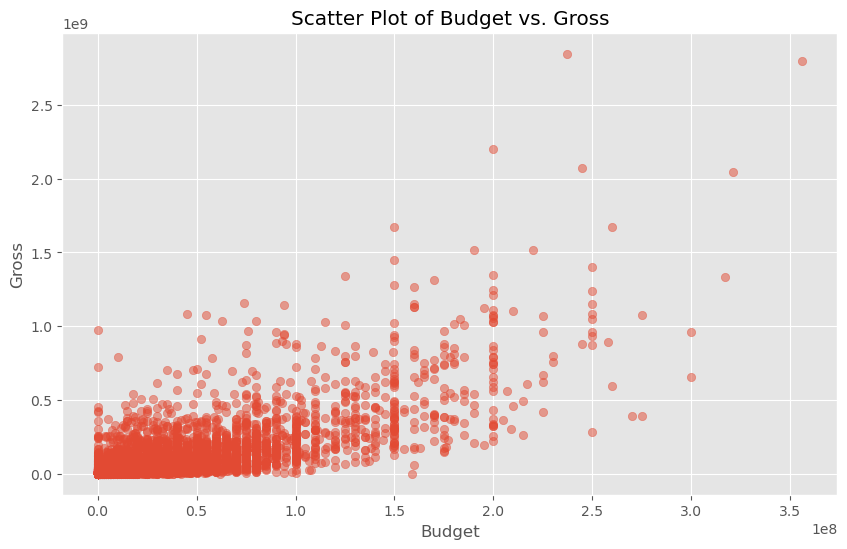

In [50]:
# Scatter plot with budget vs gross

plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['gross'], alpha=0.5)
plt.title('Scatter Plot of Budget vs. Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)

plt.show()

In [51]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


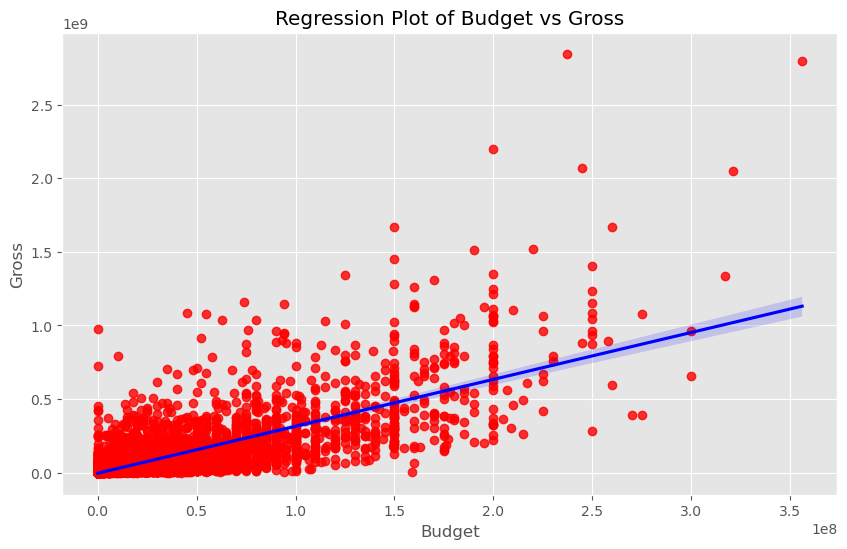

In [53]:
# Plotting the regplot of the budget vs gross using seaborn

plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='gross', data=df, color='blue', scatter_kws={'color': 'red'})
plt.title('Regression Plot of Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)

plt.show()

In [ ]:
# Looking at the correlation

#pearson, kendall, spearman

In [63]:
# pearson

df2.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [64]:
# kendall

df2.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


In [65]:
# spearman

df2.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000


In [ ]:
# Here, df2 is as follows below;

In [57]:
# Had to drop the columns with the data type 'Object' so as to be left with the ones with 'float64' and 'int64', then saved it as df2
df2 = df.drop(df.select_dtypes(include=['object']).columns, axis=1)

In [60]:
df2

,year,score,votes,budget,gross,runtime
5445,2009,7.8,1100000.0,237000000,2847246203,162.0
7445,2019,8.4,903000.0,356000000,2797501328,181.0
3045,1997,7.8,1100000.0,200000000,2201647264,194.0
6663,2015,7.8,876000.0,245000000,2069521700,138.0
7244,2018,8.4,897000.0,321000000,2048359754,149.0
...,...,...,...,...,...,...
1201,1987,6.6,3300.0,5800000,0,94.0
1199,1987,4.8,1400.0,0,0,86.0
1192,1987,6.2,2200.0,0,0,110.0
1184,1987,4.0,2100.0,75000,0,72.0


In [ ]:
# High correlation between budget and gross

In [66]:
df2.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


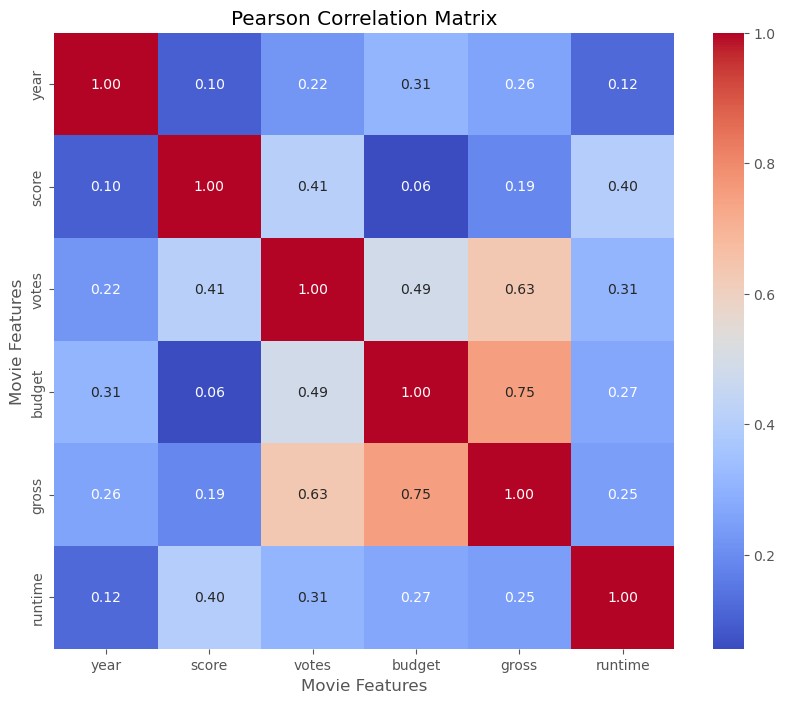

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [72]:
# Looking at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [73]:
# Numerizing columns using the below functions

def numerize_column(column):
    unique_values = column.unique()
    mapping = {value: np.random.randint(1, len(unique_values)+1) for value in unique_values}
    return column.map(mapping)

In [74]:
# Numerized columns with data type 'object' to category type

for column in df.select_dtypes(include=['object']).columns:
    df[column] = numerize_column(df[column])

In [ ]:
# From here df is now numerized
# The original df is now df3

In [76]:
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
5445,6932,13,5,2009,1979,7.8,1100000.0,2733,4143,1030,55,237000000,2847246203,121,162.0,24
7445,2361,13,5,2019,1839,8.4,903000.0,1617,1080,1751,55,356000000,2797501328,441,181.0,2
3045,1025,13,8,1997,2881,7.8,1100000.0,2733,4143,1226,55,200000000,2201647264,121,194.0,11
6663,5768,13,5,2015,222,7.8,876000.0,723,3657,1336,55,245000000,2069521700,1043,138.0,29
7244,6994,13,5,2018,2558,8.4,897000.0,1617,1080,1751,55,321000000,2048359754,441,149.0,33
7480,1834,2,12,2019,972,6.9,222000.0,886,2264,1192,55,260000000,1670727580,119,118.0,2
6653,3634,13,5,2015,225,7.0,593000.0,1335,520,1902,55,150000000,1670516444,1680,124.0,29
6043,5208,13,5,2012,3096,8.0,1300000.0,1045,127,1751,55,220000000,1518815515,441,143.0,20
6646,2180,13,5,2015,771,7.1,370000.0,885,2777,1049,55,190000000,1515341399,1680,137.0,29
7494,1174,2,12,2019,2407,6.8,148000.0,1316,880,2578,55,150000000,1450026933,2080,103.0,2


In [88]:
df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [80]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
5445,6932,13,5,2009,1979,7.8,1100000.0,2733,4143,1030,55,237000000,2847246203,121,162.0,24
7445,2361,13,5,2019,1839,8.4,903000.0,1617,1080,1751,55,356000000,2797501328,441,181.0,2
3045,1025,13,8,1997,2881,7.8,1100000.0,2733,4143,1226,55,200000000,2201647264,121,194.0,11
6663,5768,13,5,2015,222,7.8,876000.0,723,3657,1336,55,245000000,2069521700,1043,138.0,29
7244,6994,13,5,2018,2558,8.4,897000.0,1617,1080,1751,55,321000000,2048359754,441,149.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,5865,13,9,1987,1108,6.6,3300.0,2892,1516,1304,55,5800000,0,176,94.0,10
1199,4068,2,14,1987,1529,4.8,1400.0,382,1937,1554,55,0,0,1249,86.0,10
1192,4721,13,7,1987,705,6.2,2200.0,2496,1854,1005,15,0,0,703,110.0,10
1184,319,13,7,1987,828,4.0,2100.0,1310,925,752,55,75000,0,1209,72.0,10


In [81]:
# I Imported the data again and labelled it df3 as shown below;

df3 = pd.read_csv(r"movies.csv")

In [83]:
df3['budget'] = pd.to_numeric(df3['budget'], errors='coerce')
df3['gross'] = pd.to_numeric(df3['gross'], errors='coerce')

df3['budget'].fillna(0, inplace=True)
df3['gross'].fillna(0, inplace=True)

df3['budget'] = df3['budget'].astype('int64')
df3['gross'] = df3['gross'].astype('int64')

In [85]:
df3['Year Correct'] = df3['released'].str.extract(r'(\d{4})')
df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [86]:
df3 = df3.sort_values(by='gross', ascending=False)
df3['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [87]:
df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


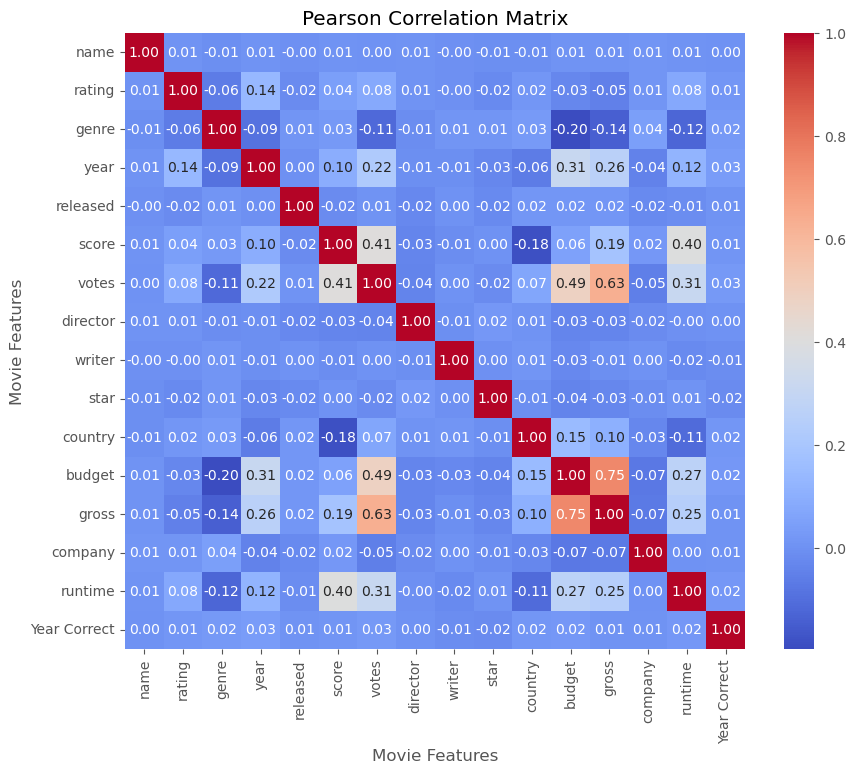

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [93]:
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Correct
name,1.000000,0.005671,-0.005202,0.008761,-0.000268,0.008311,0.003949,0.006560,-0.000487,-0.008951,-0.006745,0.007200,0.005422,0.014302,0.006940,0.002914
rating,0.005671,1.000000,-0.062640,0.136444,-0.017048,0.043670,0.082431,0.006456,-0.002716,-0.020974,0.016407,-0.031977,-0.049564,0.012503,0.075668,0.014964
genre,-0.005202,-0.062640,1.000000,-0.090161,0.013337,0.028011,-0.113041,-0.012885,0.010503,0.012885,0.029141,-0.195878,-0.142292,0.044585,-0.124639,0.024677
year,0.008761,0.136444,-0.090161,1.000000,0.000128,0.097995,0.222945,-0.005179,-0.005899,-0.031090,-0.062036,0.309212,0.261900,-0.042697,0.120811,0.033393
released,-0.000268,-0.017048,0.013337,0.000128,1.000000,-0.016233,0.006467,-0.023088,0.004269,-0.022153,0.015126,0.015227,0.016306,-0.018381,-0.012185,0.006772
score,0.008311,0.043670,0.028011,0.097995,-0.016233,1.000000,0.409182,-0.033620,-0.012229,0.000935,-0.184574,0.055665,0.186392,0.021918,0.399451,0.013654
votes,0.003949,0.082431,-0.113041,0.222945,0.006467,0.409182,1.000000,-0.037062,0.003077,-0.017020,0.069379,0.486862,0.632834,-0.052540,0.309212,0.025721
director,0.006560,0.006456,-0.012885,-0.005179,-0.023088,-0.033620,-0.037062,1.000000,-0.005121,0.020856,0.007220,-0.034737,-0.034853,-0.017012,-0.000381,0.002264
writer,-0.000487,-0.002716,0.010503,-0.005899,0.004269,-0.012229,0.003077,-0.005121,1.000000,0.000144,0.014079,-0.026199,-0.007509,0.000585,-0.022983,-0.011619
star,-0.008951,-0.020974,0.012885,-0.031090,-0.022153,0.000935,-0.017020,0.020856,0.000144,1.000000,-0.008748,-0.038026,-0.031238,-0.010139,0.005872,-0.016582


In [98]:
# Unstacking the correlation matrix obtained from df.corr()

correlation_matrix = df.corr()
unstacked_correlation = correlation_matrix.unstack()
unstacked_correlation.head(75)

name      name        1.000000
          rating      0.005671
          genre      -0.005202
          year        0.008761
          released   -0.000268
                        ...   
released  votes       0.006467
          director   -0.023088
          writer      0.004269
          star       -0.022153
          country     0.015126
Length: 75, dtype: float64

In [104]:
# Making the correlation values for budget and gross appear first in the unstacked series, followed by the correlations for the other columns.

custom_order = ['budget', 'gross'] + [col for col in correlation_matrix.columns if col not in ['budget', 'gross']]
correlation_matrix = correlation_matrix.reindex(index=custom_order, columns=custom_order)
unstacked_correlation = correlation_matrix.unstack()
unstacked_correlation.head(35)

budget  budget          1.000000
        gross           0.750157
        name            0.007200
        rating         -0.031977
        genre          -0.195878
        year            0.309212
        released        0.015227
        score           0.055665
        votes           0.486862
        director       -0.034737
        writer         -0.026199
        star           -0.038026
        country         0.146675
        company        -0.072855
        runtime         0.269510
        Year Correct    0.021333
gross   budget          0.750157
        gross           1.000000
        name            0.005422
        rating         -0.049564
        genre          -0.142292
        year            0.261900
        released        0.016306
        score           0.186392
        votes           0.632834
        director       -0.034853
        writer         -0.007509
        star           -0.031238
        country         0.103136
        company        -0.065475
        ru

In [110]:
# Pairing the above correlations and displaying them in a structured manner

correlation_matrix = df.corr()
custom_order = ['budget', 'gross'] + [col for col in correlation_matrix.columns if col not in ['budget', 'gross']]
correlation_matrix = correlation_matrix.reindex(index=custom_order, columns=custom_order)
unstacked_correlation = correlation_matrix.unstack()

correlation_df = unstacked_correlation.reset_index()
correlation_df.columns = ['Feature1', 'Feature2', 'Correlation']

correlation_df = correlation_df[correlation_df['Feature1'] != correlation_df['Feature2']]
correlation_df = correlation_df.drop_duplicates(subset=['Correlation'])

top_35_correlations = correlation_df.head(35)
print(top_35_correlations)

   Feature1      Feature2  Correlation
1    budget         gross     0.750157
2    budget          name     0.007200
3    budget        rating    -0.031977
4    budget         genre    -0.195878
5    budget          year     0.309212
6    budget      released     0.015227
7    budget         score     0.055665
8    budget         votes     0.486862
9    budget      director    -0.034737
10   budget        writer    -0.026199
11   budget          star    -0.038026
12   budget       country     0.146675
13   budget       company    -0.072855
14   budget       runtime     0.269510
15   budget  Year Correct     0.021333
18    gross          name     0.005422
19    gross        rating    -0.049564
20    gross         genre    -0.142292
21    gross          year     0.261900
22    gross      released     0.016306
23    gross         score     0.186392
24    gross         votes     0.632834
25    gross      director    -0.034853
26    gross        writer    -0.007509
27    gross          star

In [112]:
high_correlations = correlation_df[correlation_df['Correlation'] > 0.5]
high_correlations = high_correlations.sort_values(by='Correlation', ascending=False)
high_correlations

,Feature1,Feature2,Correlation
1,budget,gross,0.750157
24,gross,votes,0.632834


In [ ]:
# The correlation between budget and gross earnings is 0.750157.
# The correlation between gross earnings and votes is 0.632834.

# 1. Budget has a high correlation with gross earnings (0.750157), which indicates a strong relationship between these two variables.
# 2. Votes also have a high correlation with gross earnings (0.632834), though not as strong as the correlation between budget and gross earnings.

# Therefore, it is correct to say that budget and votes are both significantly correlated with gross earnings, with budget having a slightly higher correlation.

# Thank You!